In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.crowdsourcing import Crowdsourcing
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1']*5
o_space = {i:[0.0, 1.0] for i in bidder}
a_space = {i:[0.0, 0.75] for i in bidder}

param_prior = {'distribution':'uniform'}
param_util = {
    'tiebreaking':'lose', 
    'type':'valuation', 
    'prices': [0.7, 0.3]}

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = Crowdsourcing(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)

own_gradient method: True


**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(1e4)
tol = 1e-4
stop_criterion = 'dist_euclidean'
regularizer = 'euclidean'
steprule_bool = True
eta = 0.05
beta = 1/20

#learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
learner = FrankWolfe(max_iter, tol, stop_criterion)

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

  0%|                    | 0.00/10.0k [00:00<?, ?it/s]


IndexError: list index out of range

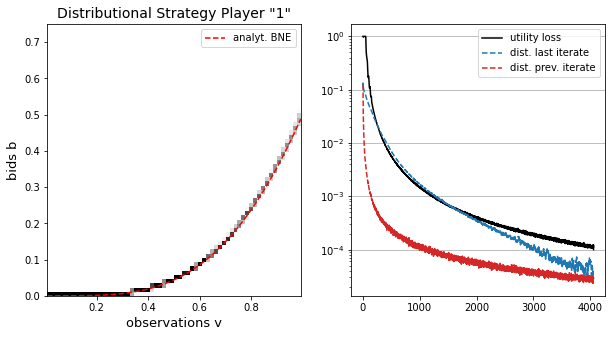

In [9]:
# analytical equilibrium
x = strategies['1'].o_discr
n_bidder = mechanism.n_bidder
beta = lambda x: param_util["prices"][0] * (n_bidder-1)/n_bidder*x**n_bidder\
               + param_util["prices"][1] * ((n_bidder-2)*x**(n_bidder-1) - (n_bidder-1)**2/n_bidder * x **n_bidder)

# plot computed equilibrium 
strategies['1'].plot(more=True, beta=beta(x))